#Visual Genome Region Description Visualization

In this demo, we will demonstrate how you can get use the [Visual Genome Python Driver](https://github.com/ranjaykrishna/visual_genome_python_driver) to get images and also their regions. Next, we will show you how you can visualize the regions to make sure that they work.

#### Getting an image id
First, let's get an image from the dataset.

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from visual_genome import api as vg
from PIL import Image as PIL_Image
import requests
from io import StringIO, BytesIO

In [7]:
ids = vg.get_image_ids_in_range(start_index=0, end_index=1)
image_id = ids[0]
print("We got an image with id: %d" % image_id)

%matplotlib inline

We got an image with id: 1


#### Getting the image data
Next, we will get some data about the image. We specifically want to know the image's url.

In [9]:
image = vg.get_image_data(id=image_id)
print("The url of the image is: %s" % image.url)

The url of the image is: https://cs.stanford.edu/people/rak248/VG_100K_2/1.jpg


#### Getting the region descriptions
Now, let's get all the region descriptions for this image.

In [11]:
regions = vg.get_region_descriptions_of_image(id=image_id)
print("The first region descriptions is: %s" % regions[0].phrase)
print("It is located in a bounding box specified by x:%d, y:%d, width:%d, height:%d" % (regions[0].x, regions[0].y, regions[0].width, regions[0].height))

The first region descriptions is: the clock is green in colour
It is located in a bounding box specified by x:421, y:57, width:82, height:139


#### Visualizing some regions
Now, we will visualize some of the regions. The x,y coordinates of a region refer to the top left corner of the region. Since there are many regions, we will only visualize the first 4.

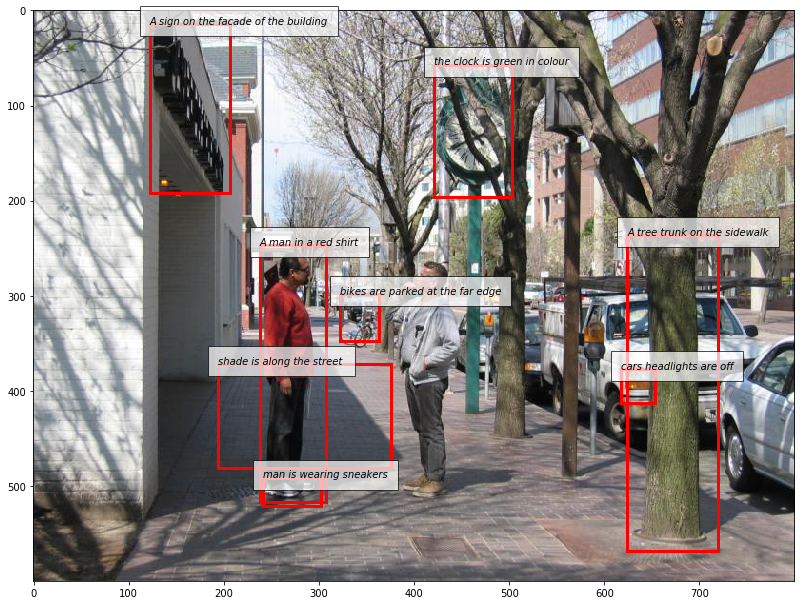

In [17]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

def visualize_regions(image, regions):
    response = requests.get(image.url)
    img = PIL_Image.open(BytesIO(response.content))
    plt.imshow(img)
    ax = plt.gca()
    for region in regions:
        ax.add_patch(Rectangle((region.x, region.y),
                               region.width,
                               region.height,
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(region.x, region.y, region.phrase, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()
    
visualize_regions(image, regions[:8])